# Analyzing the data set of YouTube videos
 
We can look for the most popular videos on the channel, the most watched playlist, the relationship between duration and number of views,the relationship between video duration and number of comments, the ratio between likes and dislikes. 

### Table of Contents

* [Imports](#chapter0)
* [Data preparation](#chapter1)
  * [Exploring the data](#section1)
  * [Cleaning the data](#section2)
  * [Adding new features](#section3)
* [Creating Visualizations](#chapter2)
* [Trending topic](#chapter3)
* [The next step](#chaptern)

### Imports <a class='anchor' id='chapter0'>

In this section we will  import the  libraries we need.

In [1]:
import datetime as dt
import pandas as pd
import seaborn as sns
import re
from datetime import timedelta
from datetime import date,datetime, time
import json
import matplotlib.pyplot as plt
from multiprocessing import Pool
import functools

%matplotlib inline


In [2]:
df = pd.read_csv('data/videosDB.csv')

In [3]:
df

,videoId,title,tags,viewCount,likeCount,dislikeCount,commentCount,duration,channelId,defaultAudioLanguage,publishedAt,liveBroadcastContent
0,rHux0gMZ3Eg,Django Tutorial for Beginners [2021],"['django tutorial', 'django', 'learn django', ...",51981.0,2970.0,28.0,514.0,PT1H2M36S,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-06-28T14:00:31Z,none
1,pTFZFxd4hOI,Docker Tutorial for Beginners [2021],"['docker tutorial', 'docker', 'learn docker', ...",285783.0,8734.0,314.0,632.0,PT56M4S,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-03-30T15:14:41Z,none
2,Eo90IEphG_M,Docker course is coming!,NaN,28449.0,1794.0,11.0,231.0,PT49S,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-03-25T17:30:03Z,none
3,qz0aGYrrlhU,HTML Tutorial for Beginners: HTML Crash Course...,"['html tutorial', 'html5 tutorial', 'html', 'h...",983673.0,29773.0,386.0,1655.0,PT1H9M34S,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-01-11T14:30:10Z,none
4,-_X6PhkjpzU,5 Front-end Development Skills to Land Your Fi...,"['front-end development', 'front end developme...",399842.0,22398.0,153.0,643.0,PT9M2S,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-01-07T14:30:14Z,none
...,...,...,...,...,...,...,...,...,...,...,...,...
31092,7udqMdiW7gE,Web Development Tutorial for beginners: Learn ...,"['github in urdu', 'GIT in Urdu', 'GIT Tutoria...",1611.0,19.0,4.0,10.0,PT50M58S,UCjM2CgqAXgXQuFjJa732IRw,ur,2016-05-18T14:12:26Z,none
31093,rn92rMiV-48,Shop Components of Bootstrap Blocks using Pine...,"['Shop Component in Pinegrow', 'Enable Shop Co...",1451.0,7.0,0.0,11.0,PT2M50S,UCjM2CgqAXgXQuFjJa732IRw,en,2016-05-17T05:16:44Z,none
31094,Fh6tIHy_7z0,WordPress and Woocommerce Specialist You can F...,"['upwork', 'wordpress', 'woocommerce', 'html',...",174.0,2.0,1.0,4.0,PT56S,UCjM2CgqAXgXQuFjJa732IRw,en-GB,2016-04-10T13:47:50Z,none
31095,IhaEO-SVrz8,You can Hire me for revolution slider on fiver...,['how to make revolution slider in wordpress i...,100.0,0.0,0.0,0.0,PT1M,UCjM2CgqAXgXQuFjJa732IRw,en-US,2016-02-25T16:46:38Z,none


#### Exploring the data <a class='anchor' id='section1'>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31097 entries, 0 to 31096
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   videoId               31097 non-null  object 
 1   title                 31097 non-null  object 
 2   tags                  28027 non-null  object 
 3   viewCount             31085 non-null  float64
 4   likeCount             31053 non-null  float64
 5   dislikeCount          31053 non-null  float64
 6   commentCount          31057 non-null  float64
 7   duration              31097 non-null  object 
 8   channelId             31097 non-null  object 
 9   defaultAudioLanguage  26396 non-null  object 
 10  publishedAt           31097 non-null  object 
 11  liveBroadcastContent  31097 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.8+ MB


In [4]:
df.describe(include='all')

,videoId,title,tags,viewCount,likeCount,dislikeCount,commentCount,duration,channelId,defaultAudioLanguage,publishedAt,liveBroadcastContent
count,31097,31097,28027,3.108500e+04,31053.000000,31053.000000,31057.000000,31097,31097,26396,31097,31097
unique,31097,30898,23743,NaN,NaN,NaN,NaN,4974,63,14,30436,2
top,sakebksjnGo,Saturday live for programmers,"['telusko', 'navin', 'reddy', 'tutorial', 'jav...",NaN,NaN,NaN,NaN,PT10M1S,UC59K-uG2A5ogwIrHw4bmlEg,en,2016-01-06T01:48:53Z,none
freq,1,23,263,NaN,NaN,NaN,NaN,56,1469,20795,37,31096
mean,NaN,NaN,NaN,7.376927e+04,1951.999549,47.836956,191.026532,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.008031e+05,10347.364388,260.849750,1326.186609,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.434000e+03,68.000000,1.000000,11.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.388700e+04,286.000000,6.000000,36.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.164400e+04,1101.000000,23.000000,116.000000,NaN,NaN,NaN,NaN,NaN


The column `liveBroadcastContent` contine only two category. The coulum can easly be droped.   
We are going to change datetime format of the `publshedAt` column to yyyy-mm-dd.

#### Cleaning the data <a class='anchor' id='section2'>

In [5]:
df.liveBroadcastContent.value_counts()

none        31096
upcoming        1
Name: liveBroadcastContent, dtype: int64

In [6]:
# drop liveBroadcastContent column
df.drop('liveBroadcastContent',axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31097 entries, 0 to 31096
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   videoId               31097 non-null  object 
 1   title                 31097 non-null  object 
 2   tags                  28027 non-null  object 
 3   viewCount             31085 non-null  float64
 4   likeCount             31053 non-null  float64
 5   dislikeCount          31053 non-null  float64
 6   commentCount          31057 non-null  float64
 7   duration              31097 non-null  object 
 8   channelId             31097 non-null  object 
 9   defaultAudioLanguage  26396 non-null  object 
 10  publishedAt           31097 non-null  object 
dtypes: float64(4), object(7)
memory usage: 2.6+ MB


##### Missing values

we will fill the missing values in `viewCount`, `likeCount`, `dislikeCount` and `commentCount` columns by `0`.

In [8]:
df.fillna({'viewCount':0, 'likeCount':0, 'dislikeCount':0, 'commentCount':0},inplace=True)

we will convert the type of `viewCount`, `likeCount`, `dislikeCount` and `commentCount` columns to `int`.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31097 entries, 0 to 31096
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   videoId               31097 non-null  object 
 1   title                 31097 non-null  object 
 2   tags                  28027 non-null  object 
 3   viewCount             31097 non-null  float64
 4   likeCount             31097 non-null  float64
 5   dislikeCount          31097 non-null  float64
 6   commentCount          31097 non-null  float64
 7   duration              31097 non-null  object 
 8   channelId             31097 non-null  object 
 9   defaultAudioLanguage  26396 non-null  object 
 10  publishedAt           31097 non-null  object 
dtypes: float64(4), object(7)
memory usage: 2.6+ MB


In [10]:
df = df.astype({'viewCount':'int32', 'likeCount':'int32', 'dislikeCount':'int32', 'commentCount':'int32'}).copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31097 entries, 0 to 31096
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   videoId               31097 non-null  object
 1   title                 31097 non-null  object
 2   tags                  28027 non-null  object
 3   viewCount             31097 non-null  int32 
 4   likeCount             31097 non-null  int32 
 5   dislikeCount          31097 non-null  int32 
 6   commentCount          31097 non-null  int32 
 7   duration              31097 non-null  object
 8   channelId             31097 non-null  object
 9   defaultAudioLanguage  26396 non-null  object
 10  publishedAt           31097 non-null  object
dtypes: int32(4), object(7)
memory usage: 2.1+ MB


we convert the type of `publishedAt` column to `datetime` type and keep only the date part.

In [12]:
df['publishedAt'] = pd.to_datetime(pd.to_datetime(df.publishedAt).dt.date)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31097 entries, 0 to 31096
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   videoId               31097 non-null  object        
 1   title                 31097 non-null  object        
 2   tags                  28027 non-null  object        
 3   viewCount             31097 non-null  int32         
 4   likeCount             31097 non-null  int32         
 5   dislikeCount          31097 non-null  int32         
 6   commentCount          31097 non-null  int32         
 7   duration              31097 non-null  object        
 8   channelId             31097 non-null  object        
 9   defaultAudioLanguage  26396 non-null  object        
 10  publishedAt           31097 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(4), object(6)
memory usage: 2.1+ MB


In [14]:
df.duration.head()

0    PT1H2M36S
1      PT56M4S
2        PT49S
3    PT1H9M34S
4       PT9M2S
Name: duration, dtype: object

In [15]:
#  https://github.com/CoreyMSchafer/code_snippets/blob/master/Python/YouTube-API/02-Playlist-Duration/playlist.py
def cleanDuration(duration):

    h = re.compile(r'(\d+)H')
    m = re.compile(r'(\d+)M')
    s = re.compile(r'(\d+)S')

    hours = h.search(duration)
    hours = int(hours.group(1)) if hours else 0
    minutes = m.search(duration)
    minutes = int(minutes.group(1)) if minutes else 0
    seconds = s.search(duration) 
    seconds = int(seconds.group(1)) if seconds else 0
    video_duration = timedelta(
        hours = hours,
        minutes = minutes,
        seconds = seconds) #.total_seconds()
    return video_duration


In [16]:
df['duration'] = df['duration'].apply(cleanDuration)

In [19]:
data = df.duration.apply(lambda x: x.seconds)

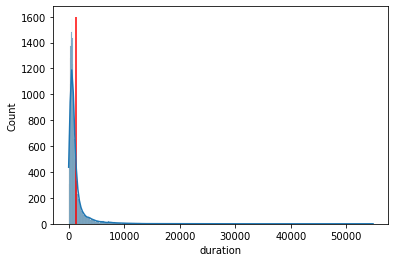

In [20]:
sns.histplot(data,kde=True)
plt.vlines(data.mean(), 0, 1600,color='r')
plt.show()

In [21]:
from scipy.stats import  zscore
import numpy as np



z_scores = zscore(data)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3) #.all(axis=1)

data2 = data[filtered_entries]

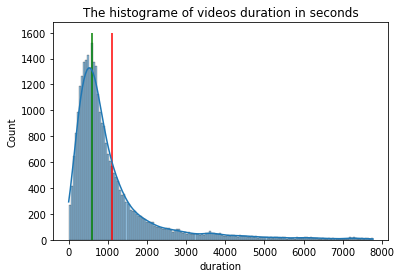

In [24]:
sns.histplot(data2,kde=True)
plt.vlines(data2.mean(), 0, 1600,color='r')
plt.vlines(data2.mode(), 0, 1600,color='g')
plt.title('The histograme of videos duration in seconds')
plt.show()

/home/zaki/Documents/youtube_api/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

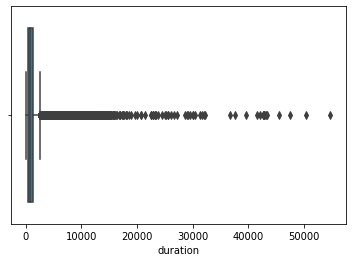

In [25]:
sns.boxplot(data)

/home/zaki/Documents/youtube_api/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

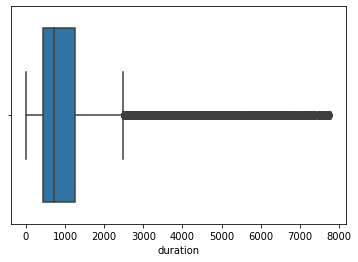

In [26]:
sns.boxplot(data2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31097 entries, 0 to 31096
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   videoId               31097 non-null  object         
 1   title                 31097 non-null  object         
 2   tags                  28027 non-null  object         
 3   viewCount             31097 non-null  int32          
 4   likeCount             31097 non-null  int32          
 5   dislikeCount          31097 non-null  int32          
 6   commentCount          31097 non-null  int32          
 7   duration              31097 non-null  timedelta64[ns]
 8   channelId             31097 non-null  object         
 9   defaultAudioLanguage  26396 non-null  object         
 10  publishedAt           31097 non-null  datetime64[ns] 
dtypes: datetime64[ns](1), int32(4), object(5), timedelta64[ns](1)
memory usage: 2.1+ MB


In [28]:
df.defaultAudioLanguage.value_counts(dropna=False)

en        20795
NaN        4701
hi         1546
en-US      1393
ur         1195
en-GB       741
es-419      345
pl          200
en-CA       135
ko           35
en-IN         4
zxx           4
mr            1
fr-CA         1
zh-TW         1
Name: defaultAudioLanguage, dtype: int64

In [29]:
channel_id = df.loc[df.defaultAudioLanguage.isnull(), 'channelId']

In [30]:
len(channel_id.unique())

54

In [31]:
channelStat = pd.read_csv('data/channelStatistic.csv')

the frequncy table of country with missing value in `defaultAudioLanguage` column.

In [32]:
channelStat.set_index('channelId').loc[channel_id.unique()].country.value_counts()

United States    30
India             9
Canada            5
Australia         3
Norway            2
Denmark           1
Romania           1
South Korea       1
Peru              1
Germany           1
Name: country, dtype: int64

If channel country is `US`, `CA`  or `Australia` we will suppose that the defaut audio language should be english. big chance `India`, we can fill the missing value. filling will not change that mutch the distrubution of the value. clear that the defa english dom 

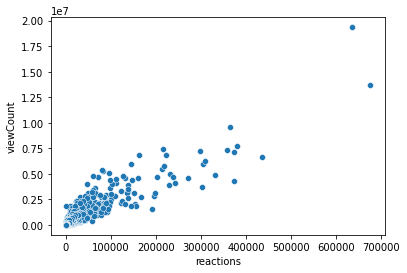

In [78]:
sns.scatterplot(data=df, y='viewCount', x='reactions')
#plt.xlim(0, 2000000)
plt.show()

#### Adding new features <a class='anchor' id='section3'>

It will be interesting to analyze the number of videos uploaded by year, month and day of the week.  
First, we have to add new columns.


In [58]:
df.publishedAt.head()

0   2021-06-28
1   2021-03-30
2   2021-03-25
3   2021-01-11
4   2021-01-07
Name: publishedAt, dtype: datetime64[ns]

##### Year

In [54]:
df.publishedAt.head().dt.year

0    2021
1    2021
2    2021
3    2021
4    2021
Name: publishedAt, dtype: int64

In [59]:
df['year'] = df.publishedAt.dt.year

##### Month

In [55]:
df.publishedAt.head().dt.month

0    6
1    3
2    3
3    1
4    1
Name: publishedAt, dtype: int64

In [60]:
df['month'] = df.publishedAt.dt.month

##### Day

The day of the week with Monday=0, Sunday=6.   
[Pandas Series property: dt.weekday](https://www.w3resource.com/pandas/series/series-dt-weekday.php)

In [57]:
df.publishedAt.head().dt.dayofweek

0    0
1    1
2    3
3    0
4    3
Name: publishedAt, dtype: int64

In [64]:
df['day'] = df.publishedAt.dt.dayofweek

##### Second

In [86]:
df['second'] = df.duration.apply(lambda x: x.seconds)

In [87]:
df.second.head()

0    3756
1    3364
2      49
3    4174
4     542
Name: second, dtype: int64

##### Reactions

In [77]:
df['reactions'] = df['commentCount'] + df['likeCount'] + df['dislikeCount']

##### Select numerics columns

In [88]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num = df.select_dtypes(include=numerics)

In [89]:
df_num.head()

,viewCount,likeCount,dislikeCount,commentCount,year,month,day,reactions,second
0,51981,2970,28,514,2021,6,0,3512,3756
1,285783,8734,314,632,2021,3,1,9680,3364
2,28449,1794,11,231,2021,3,3,2036,49
3,983673,29773,386,1655,2021,1,0,31814,4174
4,399842,22398,153,643,2021,1,3,23194,542


##### Min-Max normalization

In [90]:
df_norm=(df_num -df_num.min())/(df_num.max()-df_num.min())

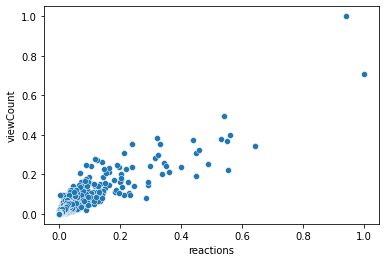

In [91]:
sns.scatterplot(data=df_norm, y='viewCount', x='reactions')
#plt.xlim(0, 2000000)
plt.show()

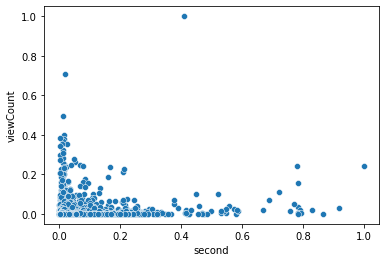

In [92]:
sns.scatterplot(data=df_norm, y='viewCount', x='second')
#plt.xlim(0, 2000000)
plt.show()

### Creating Visualizations <a class='anchor' id='chapter2'>

##### The default Audio Language

In [33]:
df.defaultAudioLanguage.value_counts(dropna=False)

en        20795
NaN        4701
hi         1546
en-US      1393
ur         1195
en-GB       741
es-419      345
pl          200
en-CA       135
ko           35
en-IN         4
zxx           4
mr            1
fr-CA         1
zh-TW         1
Name: defaultAudioLanguage, dtype: int64

In [ ]:
language_code = {'en':, 'hi':, ''}

In [34]:
df[df.defaultAudioLanguage.str.contains('en*').fillna(False)] #.value_counts(dropna=False)

,videoId,title,tags,viewCount,likeCount,dislikeCount,commentCount,duration,channelId,defaultAudioLanguage,publishedAt
0,rHux0gMZ3Eg,Django Tutorial for Beginners [2021],"['django tutorial', 'django', 'learn django', ...",51981,2970,28,514,0 days 01:02:36,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-06-28
1,pTFZFxd4hOI,Docker Tutorial for Beginners [2021],"['docker tutorial', 'docker', 'learn docker', ...",285783,8734,314,632,0 days 00:56:04,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-03-30
2,Eo90IEphG_M,Docker course is coming!,NaN,28449,1794,11,231,0 days 00:00:49,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-03-25
3,qz0aGYrrlhU,HTML Tutorial for Beginners: HTML Crash Course...,"['html tutorial', 'html5 tutorial', 'html', 'h...",983673,29773,386,1655,0 days 01:09:34,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-01-11
4,-_X6PhkjpzU,5 Front-end Development Skills to Land Your Fi...,"['front-end development', 'front end developme...",399842,22398,153,643,0 days 00:09:02,UCWv7vMbMWH4-V0ZXdmDpPBA,en,2021-01-07
...,...,...,...,...,...,...,...,...,...,...,...
31091,CXe9FgqdGnI,How to Create Owl Carousel Slider using Owl Ca...,"['easily use owl carousel with pinegrow', 'Owl...",3472,10,2,21,0 days 00:10:05,UCjM2CgqAXgXQuFjJa732IRw,en,2016-08-13
31093,rn92rMiV-48,Shop Components of Bootstrap Blocks using Pine...,"['Shop Component in Pinegrow', 'Enable Shop Co...",1451,7,0,11,0 days 00:02:50,UCjM2CgqAXgXQuFjJa732IRw,en,2016-05-17
31094,Fh6tIHy_7z0,WordPress and Woocommerce Specialist You can F...,"['upwork', 'wordpress', 'woocommerce', 'html',...",174,2,1,4,0 days 00:00:56,UCjM2CgqAXgXQuFjJa732IRw,en-GB,2016-04-10
31095,IhaEO-SVrz8,You can Hire me for revolution slider on fiver...,['how to make revolution slider in wordpress i...,100,0,0,0,0 days 00:01:00,UCjM2CgqAXgXQuFjJa732IRw,en-US,2016-02-25


In [35]:
df.defaultAudioLanguage.str.contains('en*').value_counts(dropna=False)

True     23413
NaN       4701
False     2983
Name: defaultAudioLanguage, dtype: int64

##### The videos count per Year, Month and Day

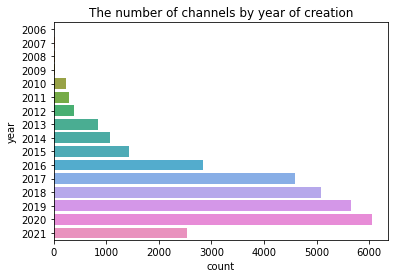

In [62]:
_ = sns.countplot(y="year", data=df)
plt.title('The number of videos by year')
plt.show()

In [74]:
import calendar

months = [calendar.month_name[i] for i in range(1,13)]

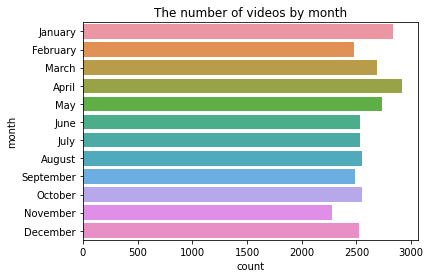

In [75]:
ax = sns.countplot(y="month", data=df)
ax.set_yticklabels(months)
plt.title('The number of videos by month')
plt.show()

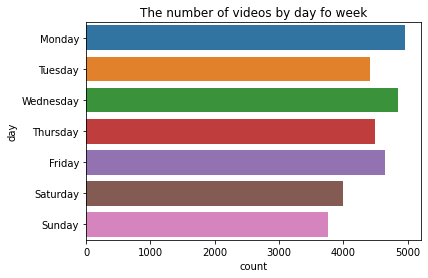

In [70]:
ax = sns.countplot(y="day", data=df)
plt.title('The number of videos by day fo week')
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
ax.set_yticklabels(weekDays)
plt.show()

##### 2019 vs. 2020

In [93]:
df2019 = df[df.year == 2019]
df2020 = df[df.year == 2020]

In [94]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5655 entries, 20 to 30469
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   videoId               5655 non-null   object         
 1   title                 5655 non-null   object         
 2   tags                  5350 non-null   object         
 3   viewCount             5655 non-null   int32          
 4   likeCount             5655 non-null   int32          
 5   dislikeCount          5655 non-null   int32          
 6   commentCount          5655 non-null   int32          
 7   duration              5655 non-null   timedelta64[ns]
 8   channelId             5655 non-null   object         
 9   defaultAudioLanguage  5339 non-null   object         
 10  publishedAt           5655 non-null   datetime64[ns] 
 11  year                  5655 non-null   int64          
 12  month                 5655 non-null   int64          
 13  d

In [96]:
productivityByMonth2019 = df2019[['reactions', 'month', 'duration','videoId']].groupby(['month']).agg(
    maxDuration=pd.NamedAgg('duration', aggfunc=max),
    minDuration=pd.NamedAgg('duration', aggfunc=min),
    totalDuration=pd.NamedAgg('duration', aggfunc=sum),
    totalReactions=pd.NamedAgg('reactions', aggfunc=sum),
    numberOfUplodedVideos=pd.NamedAgg("videoId", aggfunc='count'),

)

productivityByMonth2019.reset_index(inplace=True)

productivityByMonth2019

,month,maxDuration,minDuration,totalDuration,totalReactions,numberOfUplodedVideos
0,1,0 days 03:15:35,0 days 00:00:20,7 days 11:20:31,1284303,554
1,2,0 days 11:55:01,0 days 00:00:49,7 days 05:41:30,1605045,446
2,3,0 days 11:55:01,0 days 00:00:15,7 days 07:08:07,1086960,473
3,4,0 days 08:13:14,0 days 00:00:53,7 days 00:34:48,1165987,433
4,5,0 days 11:55:02,0 days 00:00:46,7 days 13:52:43,1381751,464
5,6,0 days 05:56:54,0 days 00:00:17,8 days 08:55:17,1295149,408
6,7,0 days 10:28:15,0 days 00:00:30,9 days 09:20:49,1599519,535
7,8,0 days 05:45:44,0 days 00:01:27,8 days 06:28:06,1925377,600
8,9,0 days 08:28:13,0 days 00:01:08,7 days 16:00:10,1186003,433
9,10,0 days 12:04:54,0 days 00:00:53,7 days 22:33:28,1282976,421


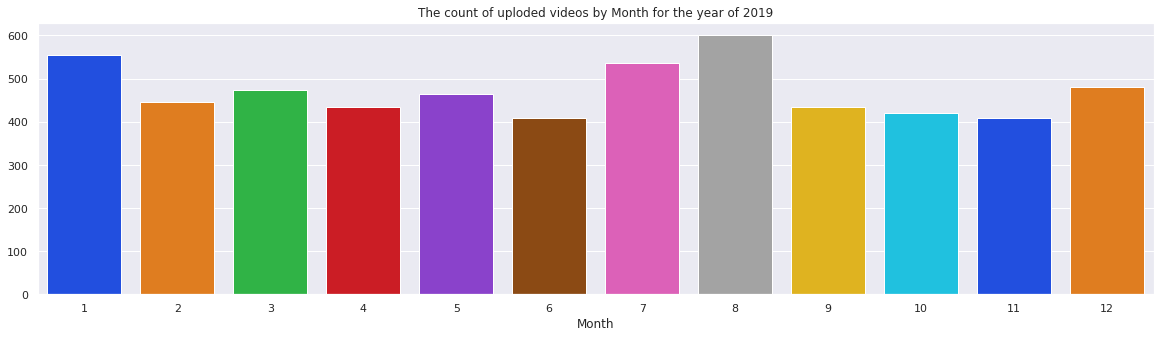

In [103]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="numberOfUplodedVideos", x='month', data=productivityByMonth2019, palette="bright") #
plot.set(xlabel='Month', ylabel='')
plot.set_title(f'The count of uploded videos by Month for the year of 2019')
plt.show()

In [104]:
productivityByMonth2020 = df2020[['reactions', 'month', 'duration','videoId']].groupby(['month']).agg(
    maxDuration=pd.NamedAgg('duration', aggfunc=max),
    minDuration=pd.NamedAgg('duration', aggfunc=min),
    totalDuration=pd.NamedAgg('duration', aggfunc=sum),
    totalReactions=pd.NamedAgg('reactions', aggfunc=sum),
    numberOfUplodedVideos=pd.NamedAgg("videoId", aggfunc='count'),

)

productivityByMonth2020.reset_index(inplace=True)

productivityByMonth2020

,month,maxDuration,minDuration,totalDuration,totalReactions,numberOfUplodedVideos
0,1,0 days 04:15:36,0 days 00:01:39,7 days 07:49:47,2184492,429
1,2,0 days 13:11:26,0 days 00:00:49,7 days 09:53:22,1936203,382
2,3,0 days 03:15:57,0 days 00:01:07,7 days 16:06:57,1449573,494
3,4,0 days 12:39:45,0 days 00:00:03,10 days 19:46:40,1608246,627
4,5,0 days 06:21:13,0 days 00:01:16,9 days 16:52:21,1647032,604
5,6,0 days 03:54:36,0 days 00:00:46,7 days 05:40:00,1872887,450
6,7,0 days 15:13:24,0 days 00:00:26,12 days 10:59:58,2122022,521
7,8,0 days 13:59:03,0 days 00:01:22,11 days 13:59:53,1462183,544
8,9,0 days 11:52:24,0 days 00:00:51,11 days 07:37:42,1984361,560
9,10,0 days 12:01:50,0 days 00:00:44,14 days 17:53:13,1937893,584


In [140]:
7 * 86400 +  7 * 3600 + 49 *60 + 47 

632987

In [145]:
productivityByMonth2020.totalDuration.apply(lambda x: x.days)

0      7
1      7
2      7
3     10
4      9
5      7
6     12
7     11
8     11
9     14
10     8
11     7
Name: totalDuration, dtype: int64

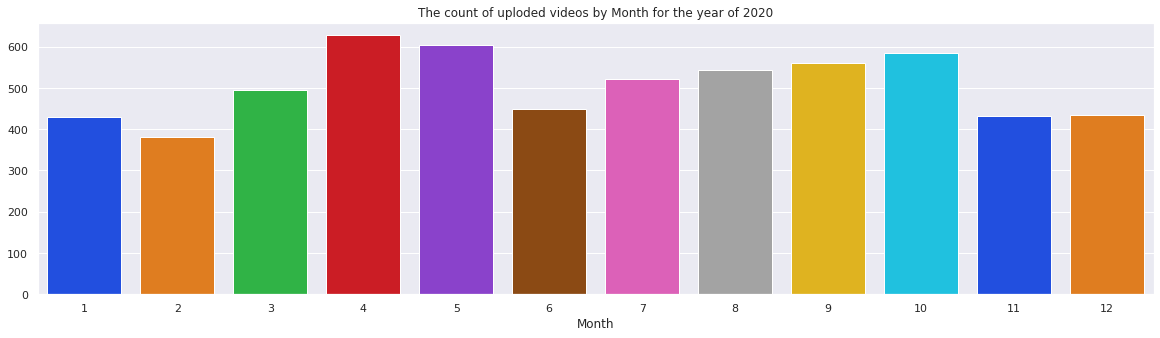

In [105]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="numberOfUplodedVideos", x='month', data=productivityByMonth2020, palette="bright") #
plot.set(xlabel='Month', ylabel='')
plot.set_title(f'The count of uploded videos by Month for the year of 2020')
plt.show()

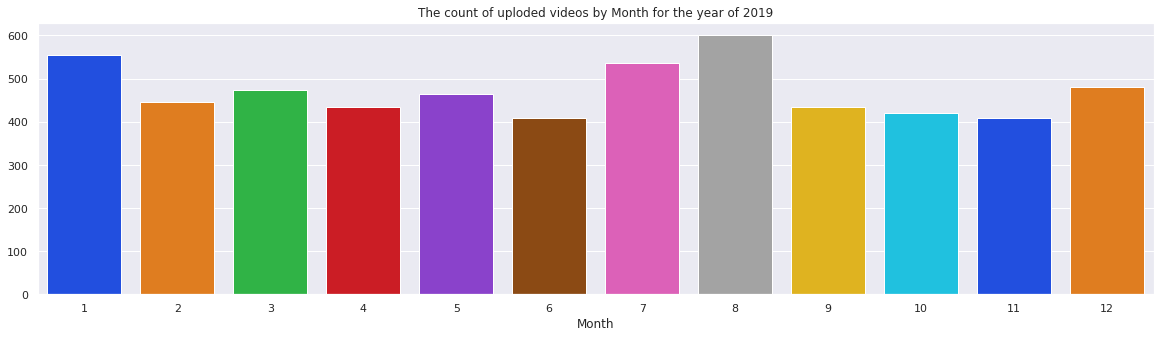

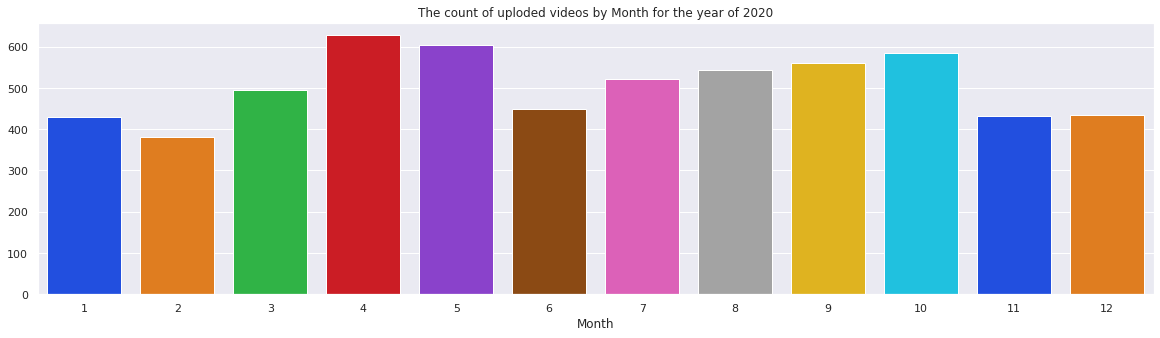

In [106]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="numberOfUplodedVideos", x='month', data=productivityByMonth2019, palette="bright") #
plot.set(xlabel='Month', ylabel='')
plot.set_title(f'The count of uploded videos by Month for the year of 2019')
plt.show()
print()
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="numberOfUplodedVideos", x='month', data=productivityByMonth2020, palette="bright") #
plot.set(xlabel='Month', ylabel='')
plot.set_title(f'The count of uploded videos by Month for the year of 2020')
plt.show()

In [134]:
productivityByMonthYear = df[df.year.between(2019,2021)][['reactions', 'month', 'duration','videoId','year', 'viewCount']].groupby(['month','year']).agg(
    maxDuration=pd.NamedAgg('duration', aggfunc=max),
    minDuration=pd.NamedAgg('duration', aggfunc=min),
    totalDuration=pd.NamedAgg('duration', aggfunc=sum),
    totalReactions=pd.NamedAgg('reactions', aggfunc=sum),
    numberOfUplodedVideos=pd.NamedAgg("videoId", aggfunc='count'),
    totalViewCount=pd.NamedAgg('viewCount', aggfunc=sum),

)

productivityByMonthYear.reset_index(inplace=True)

#productivityByMonthYear

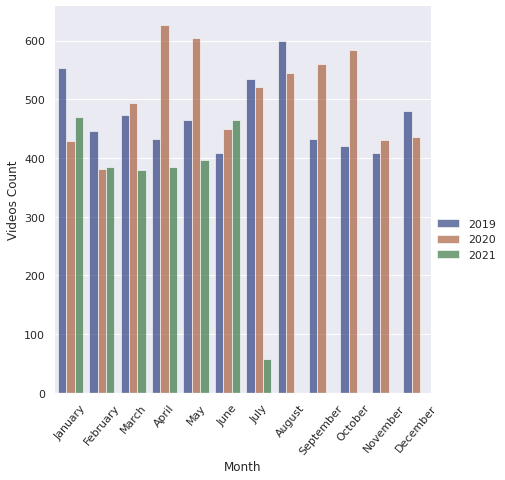

In [133]:
g = sns.catplot(
    data=productivityByMonthYear, kind="bar",
    y="numberOfUplodedVideos", x='month', hue="year",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_xticklabels(months)
g.set_xticklabels(rotation=50)
g.set_axis_labels("Month", "Videos Count")
g.legend.set_title("") #The Videos Count by Months and Years

We can notice a peak in the number of videos uploaded between March and June 2020, during the lockdown.

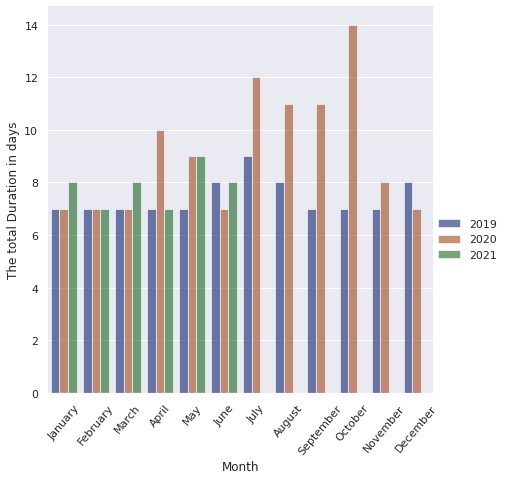

In [147]:
productivityByMonthYear['totalDurationDay']= productivityByMonthYear.totalDuration.apply(lambda x: x.days)
g = sns.catplot(
    data=productivityByMonthYear, kind="bar",
    y="totalDurationDay", x='month', hue="year",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_xticklabels(months)
g.set_xticklabels(rotation=50)
g.set_axis_labels("Month", "The total Duration in days")
g.legend.set_title("") 

# Trending topic  <a class='anchor' id='chapter3'>

In [36]:
skills = pd.read_csv('data/Skills.csv')
frequency = dict()

In [37]:
skills['Name']

0           python
1              sql
2      programming
3            spark
4              aws
          ...     
155         lucene
156          jetty
157         sqlite
158          arrow
159          heron
Name: Name, Length: 160, dtype: object

In [40]:
def count_skills(df):
    frequency = {}
    for skill_name in skills["Name"]:
        frequency[skill_name] = df['title'].str.lower().str.count(skill_name).sum()
    return frequency

In [42]:
def make_chunks(data, num_chunks):
    
    chunk_size = math.ceil(len(data) / num_chunks)
    
    return [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

In [43]:
def reducer(dic1, dic2):
    
    merged = dict()
    
    for item in dic1:
        
        merged[item] = dic1[item]+ dic2[item]
        
    return merged

In [44]:
def map_reduce(data, num_processes, mapper, reducer):
    
    chunks = make_chunks(data, num_processes)
    
    with Pool(num_processes) as pool:
        
        chunk_results = pool.map(mapper, chunks)
        
    return functools.reduce(reducer, chunk_results)

In [45]:
from functools import partial
import math

frequency = map_reduce(df, 8, count_skills, reducer)

In [46]:
frequency

{'python': 3759,
 'sql': 659,
 'programming': 2138,
 'spark': 71,
 'aws': 101,
 'java': 2315,
 'hadoop': 16,
 'etl': 22,
 'machine learning': 477,
 'scala': 20,
 'agile': 9,
 'business intelligence': 2,
 'kafka': 10,
 'azure': 106,
 'nosql': 16,
 'linux': 152,
 'hive': 11,
 'algorithm': 314,
 'data warehouse': 2,
 'functional': 32,
 'scripting': 47,
 'statistics': 51,
 'security': 90,
 'network': 303,
 'git': 470,
 'server': 365,
 'redshift': 0,
 'postgres': 97,
 'devops': 18,
 'airflow': 0,
 'tableau': 28,
 'docker': 128,
 'javascript': 1361,
 'data pipeline': 0,
 'mathematics': 20,
 'oracle': 81,
 'sql server': 41,
 's3': 63,
 'google cloud': 16,
 'mongodb': 337,
 'data lake': 0,
 'data structures': 99,
 'cassandra': 9,
 'hbase': 1,
 'elasticsearch': 16,
 'rest': 466,
 'kubernetes': 10,
 'scrum': 4,
 'shell': 38,
 'deep learning': 203,
 'project management': 1,
 'data visualization': 21,
 'jenkins': 1,
 'hdfs': 2,
 'data architecture': 0,
 'excel': 24,
 'mapreduce': 1,
 'impala': 0,


In [47]:
frequency = {k: v for k, v in sorted(frequency.items(), key=lambda item: item[1], reverse=True)}

In [48]:
frequency

{'python': 3759,
 'java': 2315,
 'programming': 2138,
 'react': 1597,
 'django': 1374,
 'javascript': 1361,
 'ide': 1174,
 'angular': 731,
 'css': 723,
 'sql': 659,
 'html': 518,
 'web development': 480,
 'machine learning': 477,
 'git': 470,
 'rest': 466,
 'oop': 416,
 'server': 365,
 'mongodb': 337,
 'algorithm': 314,
 'cli': 309,
 'network': 303,
 'software engineer': 243,
 'deep learning': 203,
 'nodejs': 172,
 'neural network': 164,
 'pandas': 157,
 'linux': 152,
 'osi': 147,
 'backend': 146,
 'docker': 128,
 'json': 120,
 'azure': 106,
 'aws': 101,
 'data structures': 99,
 'postgres': 97,
 'security': 90,
 'oracle': 81,
 'algebra': 72,
 'spark': 71,
 'sas': 70,
 's3': 63,
 'frontend': 61,
 'san': 60,
 'statistics': 51,
 'jwt': 51,
 'sqlite': 51,
 'scripting': 47,
 'scikit': 47,
 'sql server': 41,
 'shell': 38,
 'web scraping': 36,
 'oracle sql': 34,
 'functional': 32,
 'ruby': 32,
 'sap': 32,
 'eclipse': 31,
 'redis': 29,
 'arrow': 29,
 'tableau': 28,
 'ssh': 26,
 'excel': 24,
 '

In [121]:
top10_skills = dict()
i = 0
for skill  in frequency:
    
    top10_skills[skill] = frequency[skill]
    
    i += 1
    if i == 15:
        break

In [122]:
top10_skills

{'python': 3759,
 'java': 2315,
 'programming': 2138,
 'react': 1597,
 'django': 1374,
 'javascript': 1361,
 'ide': 1174,
 'angular': 731,
 'css': 723,
 'sql': 659,
 'html': 518,
 'web development': 480,
 'machine learning': 477,
 'git': 470,
 'rest': 466}

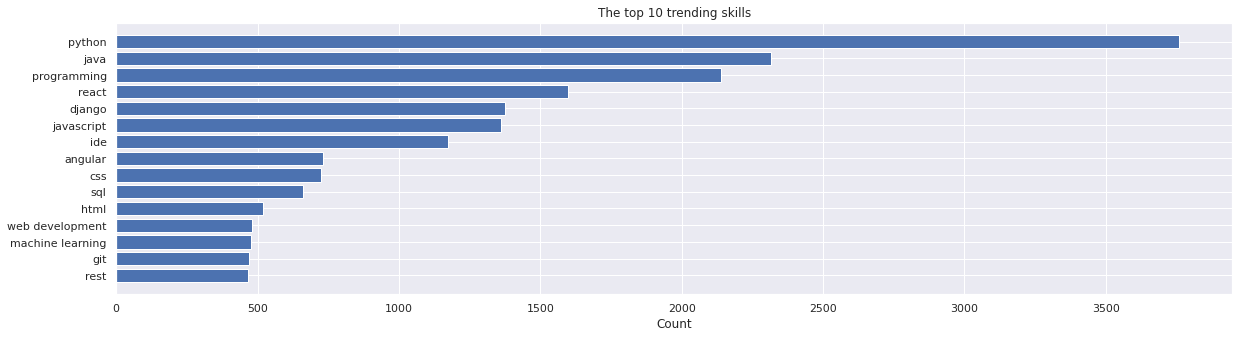

In [123]:
y_pos = np.arange(15)
fig, ax = plt.subplots()


ax.barh(y_pos, top10_skills.values())
ax.set_yticks(y_pos)
ax.set_yticklabels(top10_skills.keys())
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('The top 10 trending skills')

plt.show()

# The next step  <a class='anchor' id='chaptern'>

In [155]:
len(frequency)

160